In [1]:
import imageio

img_arr = imageio.imread('../data/p1ch4/image-dog/bobby.jpg')
img_arr.shape

/var/folders/pb/67pmhv8j3clfx77jhx5__zdr0000gn/T/ipykernel_13081/1529188539.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread('../data/p1ch4/image-dog/bobby.jpg')


(720, 1280, 3)

(-0.5, 1279.5, 719.5, -0.5)

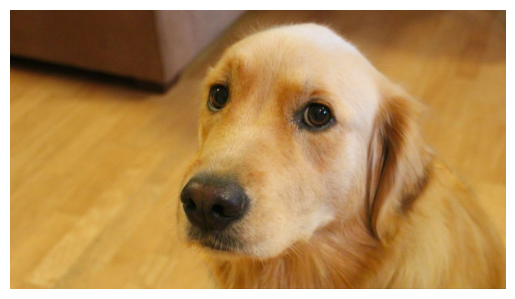

In [2]:
import matplotlib.pyplot as plt

plt.imshow(img_arr); plt.axis('off')

In [3]:
import torch

In [4]:
img_t = torch.from_numpy(img_arr) # h,w,c
out = img_t.permute(2,0,1) # c,h,w
out.shape

torch.Size([3, 720, 1280])

In [5]:
batch_size = 3

batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [6]:
from pathlib import Path

data_dir = Path('../data/p1ch4/image-cats/')
filenames = data_dir.glob('*.png')
for i, fn in enumerate(filenames):
    img_arr = imageio.imread(fn)
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2,0,1)
    img_t = img_t[:3]
    batch[i] = img_t
    
batch.shape

/var/folders/pb/67pmhv8j3clfx77jhx5__zdr0000gn/T/ipykernel_13081/3751856261.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(fn)


torch.Size([3, 3, 256, 256])

In [7]:
batch = batch.float()
batch /= 255.0
print(f"Max: {batch.max()}, Min: {batch.min()}")

Max: 1.0, Min: 0.0


In [8]:
# Standardization (zero-centering followed by division with std)
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c]) # n,h,w
    std  = torch.std(batch[:, c])  # n,h,w
    batch[:, c] = (batch[:, c] - mean)/std